In [1]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
df = yf.download('ICICIBANK.NS', start = '2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS,ICICIBANK.NS
Date,,,,,
2020-01-01,518.854004,524.412291,517.839024,521.899002,7642793
2020-01-02,522.575623,523.832326,517.983994,518.129017,10264223
2020-01-03,520.884033,522.769030,518.370744,520.062397,9594690
2020-01-06,508.172424,519.337319,506.335749,519.337319,12534334
2020-01-07,505.465790,517.742306,504.257467,513.585686,16101835
...,...,...,...,...,...
2025-02-10,1262.599976,1265.000000,1249.349976,1257.199951,5740361
2025-02-11,1252.750000,1261.849976,1248.400024,1255.849976,6586627


In [4]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df.tail(20)

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-15,1238.250000,1244.400024,1230.000000,1234.000000,5355382
2025-01-16,1249.099976,1255.500000,1239.650024,1245.099976,11895924
2025-01-17,1225.449951,1249.000000,1218.000000,1243.349976,9790533
2025-01-20,1232.949951,1241.750000,1215.250000,1223.900024,7676418
2025-01-21,1196.150024,1238.949951,1192.699951,1236.949951,20520898
2025-01-22,1200.449951,1207.500000,1191.800049,1201.000000,10377123
2025-01-23,1201.750000,1207.900024,1186.000000,1197.250000,8770650
2025-01-24,1209.199951,1218.000000,1202.000000,1203.099976,9216792
2025-01-27,1227.949951,1234.650024,1193.099976,1195.000000,16164687


In [5]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0        518.854004
1        522.575623
2        520.884033
3        508.172394
4        505.465851
           ...     
1263    1268.199951
1264    1267.699951
1265    1272.400024
1266    1256.900024
1267    1253.750000
Name: close, Length: 1268, dtype: float64

In [6]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(1253.75)

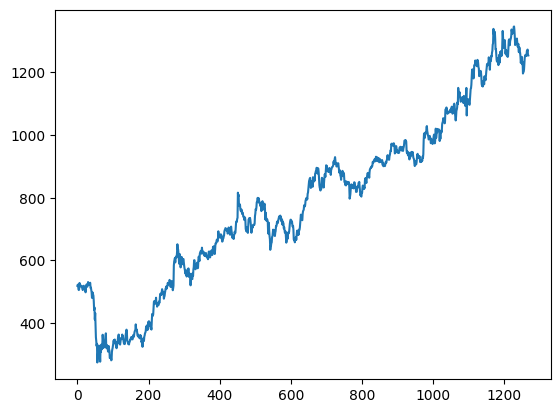

In [7]:
plt.plot(df)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
df

array([[0.22800488],
       [0.23147793],
       [0.22989932],
       ...,
       [0.93122239],
       [0.91675762],
       [0.91381798]])

In [10]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [11]:
training_size, test_size

(1014, 254)

In [12]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [15]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

In [18]:
from keras.models import load_model

In [ ]:
model.save('Icici_Pred_model.h5')

In [19]:
model = load_model('Model/Icici_Pred_model.h5')

In [20]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

740.194082168964

In [22]:
math.sqrt(mean_squared_error(y_test, test_predict))

1247.1351179186029

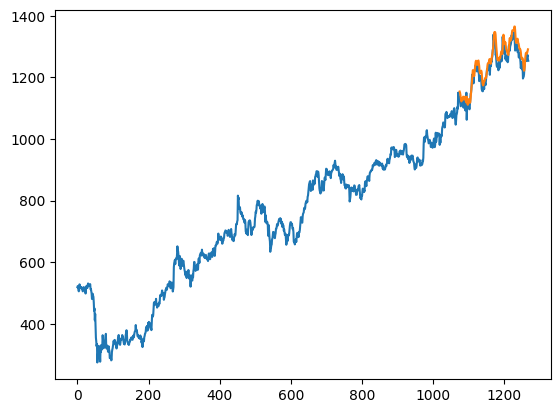

In [23]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()